In [51]:
pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
!pip install deepspeech

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import tensorflow as tf
import numpy as np
import scipy.io.wavfile as wav
import math
from IPython.display import Audio, display
import IPython.display as ipd
import matplotlib.pyplot as plt
import soundfile
import wave
from python_speech_features import mfcc
from pydub import AudioSegment
from pydub.playback import play
import random
from gtts import gTTS

In [54]:
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.pbmm
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.scorer

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  180M  100  180M    0     0   101M      0  0:00:01  0:00:01 --:--:--  102M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  909M  100  909M    0     0   116M      0  0:00:07  0:00:07 --:--:--  126M


In [55]:
import deepspeech
import numpy as np
import wave
model = deepspeech.Model('deepspeech-0.9.3-models.pbmm')
audio_file = '/content/drive/MyDrive/Colab Notebooks/Major Project/normal0.wav'
scorer_file_path = 'deepspeech-0.9.3-models.scorer'

# Load DeepSpeech model and scorer

model.enableExternalScorer(scorer_file_path)
# Define function to transcribe audio using the DeepSpeech model and scorer
def transcribe_audio(audio_file_path, model):
    # Read audio file
    with wave.open(audio_file_path, 'rb') as audio_file:
        audio = audio_file.readframes(audio_file.getnframes())
        audio = np.frombuffer(audio, dtype=np.int16)

    # Transcribe audio
    transcription = model.stt(audio)
    return transcription

# Transcribe audio file
# audio_file_path = 'path/to/audio/file.wav'
transcription = transcribe_audio(audio_file, model)

# Print transcription
print(transcription)

without the data the article useless


In [56]:
from scipy.io import wavfile
import numpy as np

# Load the audio file
sample_rate, audio = wavfile.read('/content/drive/MyDrive/Colab Notebooks/Major Project/normal0.wav')

# Preprocess the audio
# audio = (audio.astype(np.float32) / 32767.0).reshape(-1, 1)
# abc = tf.convert_to_tensor(audio, dtype=tf.float32)

In [57]:
import librosa
import librosa.display
from IPython.display import Audio, display

x = '/content/drive/MyDrive/Colab Notebooks/Major Project/normal0.wav'
  

# load audio files with librosa
scale, sr = librosa.load(x)

filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
mel_spectrogram = librosa.feature.melspectrogram(y=scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [58]:
ipd.Audio(x)

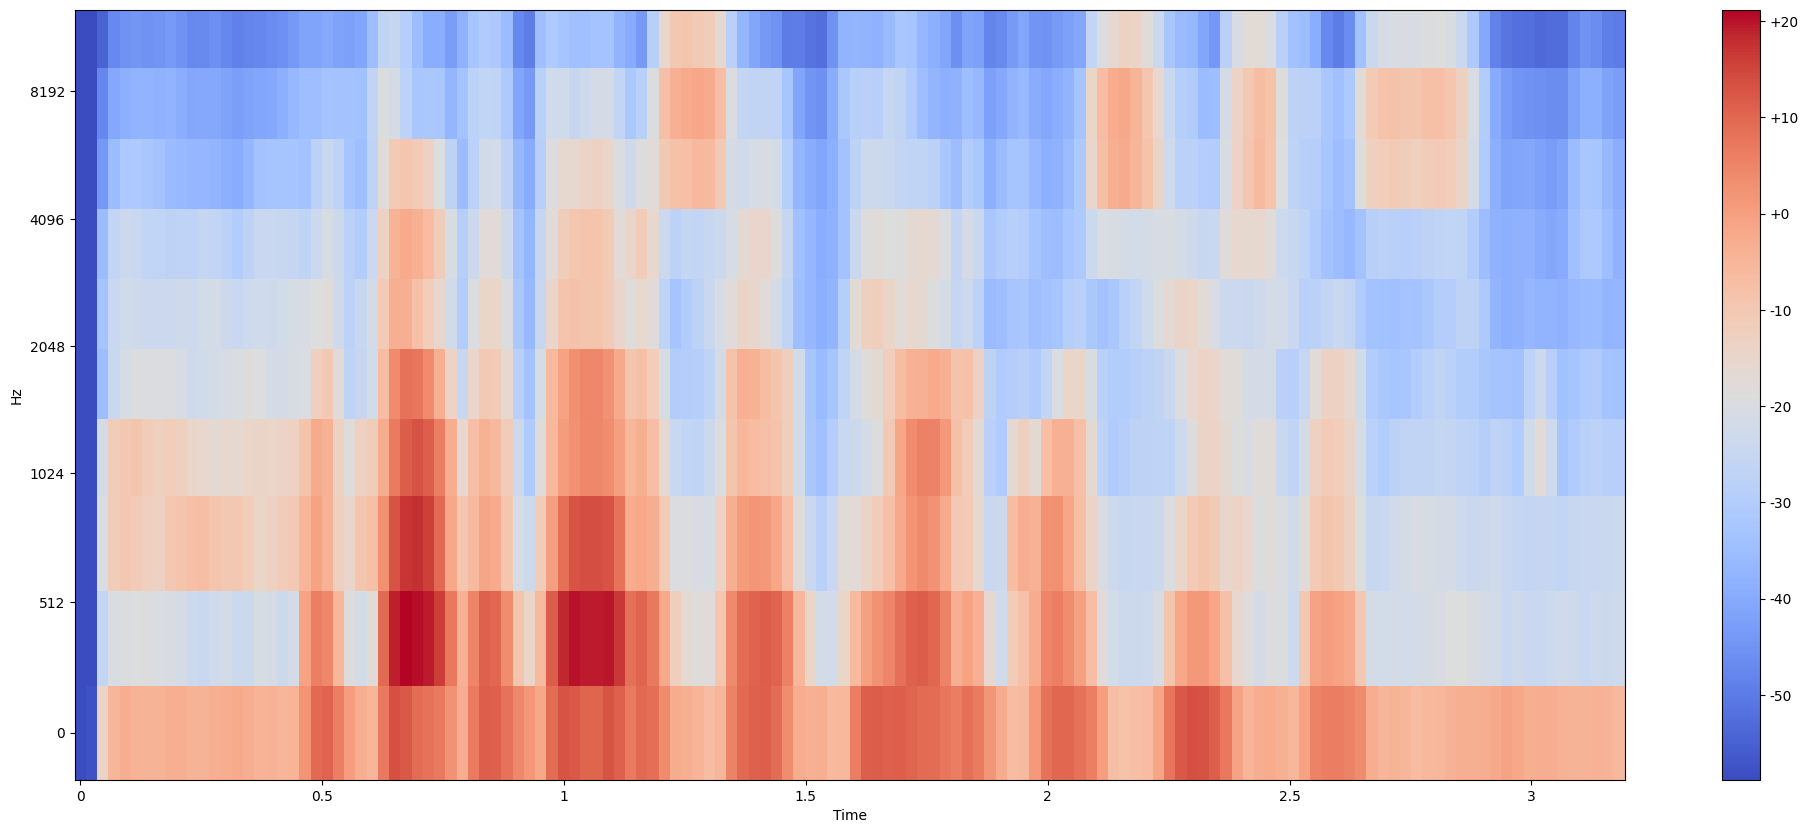

In [59]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

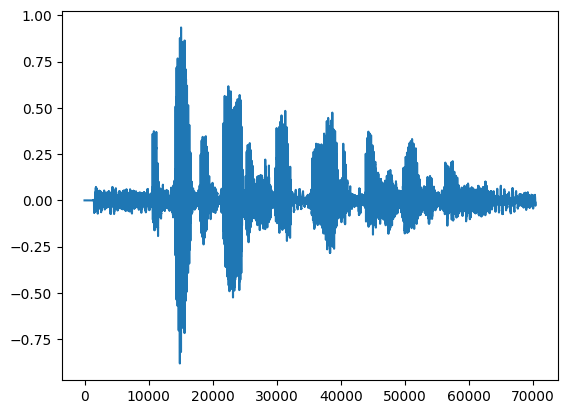

In [60]:
plt.plot(scale)

In [61]:
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

scale=np.interp(scale, (scale.min(), scale.max()), (-1, 1))
noise=get_white_noise(scale,SNR=5)
noise_audio = Audio._make_wav(noise,sr,noise.any())

In [62]:
noise_audio = Audio._make_wav(noise,sr,noise.any())
ipd.Audio(noise_audio)

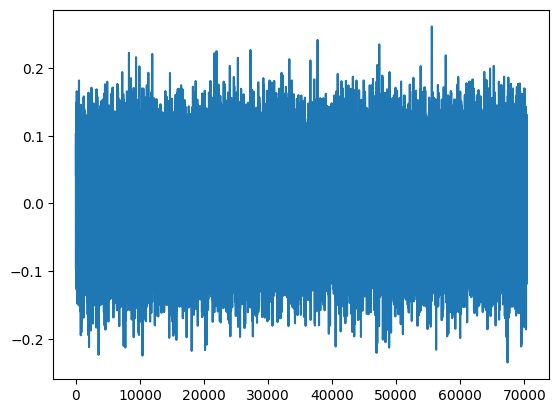

In [63]:
plt.plot(noise)

In [64]:
#***convert complex np array to polar arrays (2 apprays; abs and angle)
def to_polar(complex_ar):
    return np.abs(complex_ar),np.angle(complex_ar)

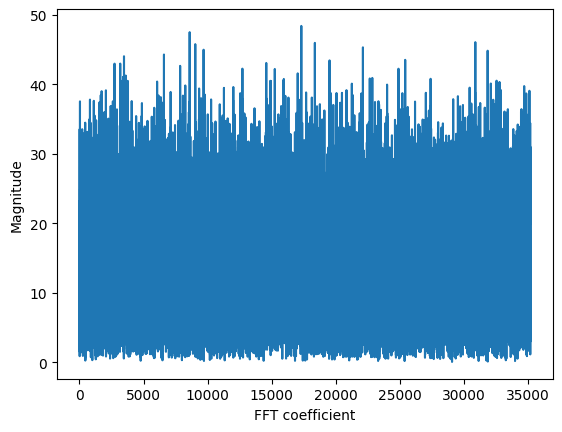

In [65]:
X=np.fft.rfft(noise)
radius,angle=to_polar(X)
plt.plot(radius)
plt.xlabel("FFT coefficient")
plt.ylabel("Magnitude")
plt.show()
signal_noise=scale+noise

In [66]:
import numpy as np

def mean_squared_error(x, y):
    return np.mean((x - y) ** 2)

In [67]:
sigaud = Audio._make_wav(signal_noise,sr,signal_noise.any())
soundfile.write('op.wav', signal_noise, sr) 
ipd.Audio(sigaud)

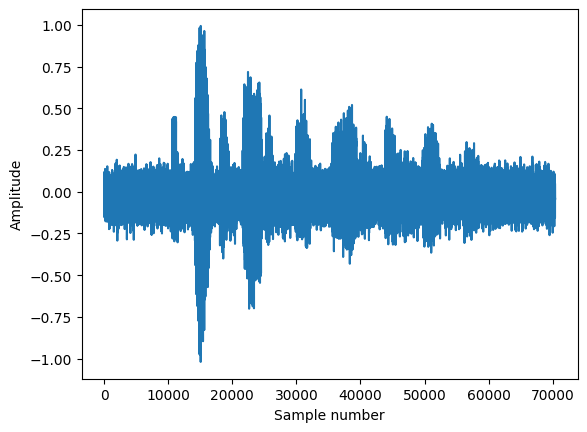

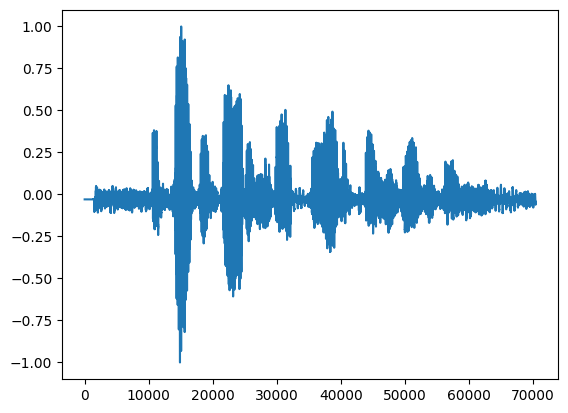

In [68]:
plt.plot(signal_noise)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.show()

plt.plot(scale)

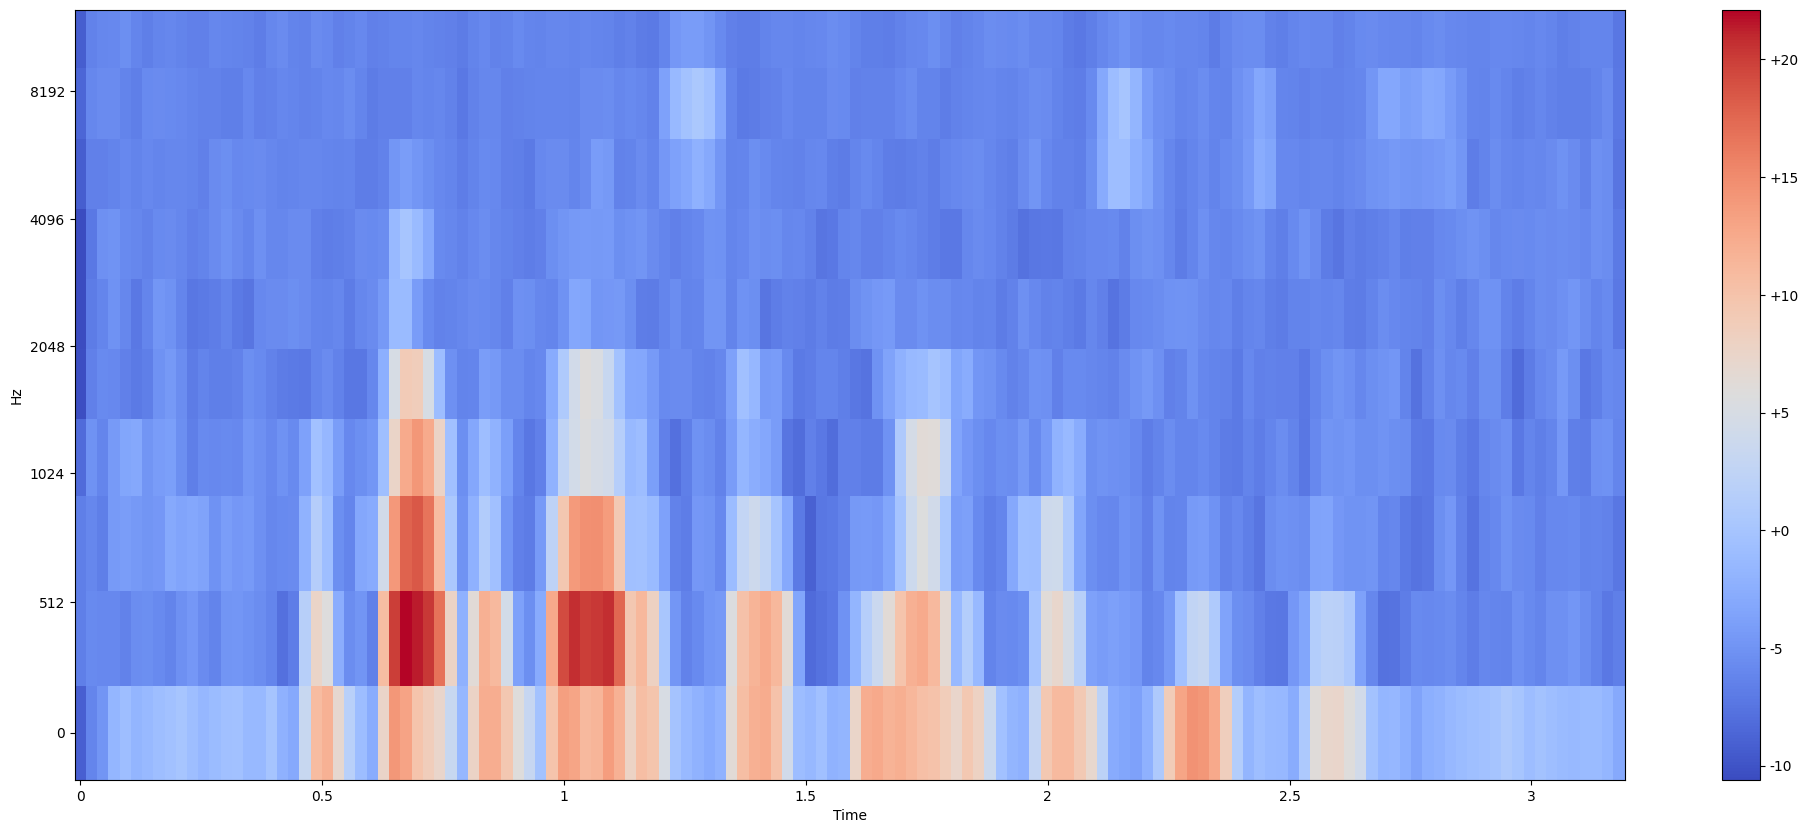

In [69]:
scale1, sr1 = librosa.load('op.wav')
mel_spectrogram1 = librosa.feature.melspectrogram(y=scale1, sr=sr1, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram1 = librosa.power_to_db(mel_spectrogram1)
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram1, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr1)
plt.colorbar(format="%+2.f")
plt.show()

In [70]:
target_phrase = 'Hello, How can i help you?'

In [71]:
from gtts import gTTS
import os

# Specify the language of the text
language = 'en'

# Create a gTTS object
myobj = gTTS(text=target_phrase, lang=language, slow=False)

# Save the audio file in WAV format
myobj.save("target.wav")

In [72]:
target_audio = "target.wav"
ipd.Audio(target_audio)

In [73]:
import librosa
import numpy as np
from scipy.signal import resample

# Load the audio signal
audio_file = '/content/drive/MyDrive/Colab Notebooks/Major Project/normal0.wav'
audio_signal, sample_rate = librosa.load(audio_file, sr=None, mono=True)

# Extract MFCC features
mfcc = librosa.feature.mfcc(y=audio_signal, sr=sample_rate, n_mfcc=13)

# Scale the MFCCs to have zero mean and unit variance
mfcc = (mfcc - np.mean(mfcc, axis=1, keepdims=True)) / np.std(mfcc, axis=1, keepdims=True)

# Load the target audio
target_file = 'target.wav'
target_signal, target_sr = librosa.load(target_file, sr=None, mono=True)

# Resample the target audio to match the sample rate of the audio signal
target_signal = resample(target_signal, int(len(target_signal) * sample_rate / target_sr))

# Pad the target audio with zeros to match the length of the audio signal
if len(target_signal) < len(audio_signal):
    target_signal = np.pad(target_signal, (0, len(audio_signal) - len(target_signal)))
else:
    audio_signal = np.pad(audio_signal, (0, len(target_signal) - len(audio_signal)))

# Scale the target audio to have a maximum amplitude of 0.1
target_signal *= 0.1 / np.max(np.abs(target_signal))

# Compute the power spectrum of the audio signal
n_fft = 2048
hop_length = 512
power_spec = np.abs(librosa.stft(audio_signal, n_fft=n_fft, hop_length=hop_length))**2

# Compute the mel filterbank
mel_basis = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=128)

# Apply the mel filterbank to the power spectrum to get the mel spectrogram
mel_spec = np.dot(mel_basis, power_spec)

# Synthesize a signal from the mel spectrogram
synth_signal = librosa.feature.inverse.mel_to_audio(mel_spec, sr=sample_rate, n_fft=n_fft, hop_length=hop_length)

# Mix the target audio with the synthesized signal
mixed_signal = synth_signal + target_signal[:len(synth_signal)]

# Write the mixed signal to an audio file
soundfile.write('mixed.wav', mixed_signal, sample_rate)

In [74]:
ipd.Audio('mixed.wav')

In [75]:
import deepspeech
import numpy as np
import wave
model = deepspeech.Model('deepspeech-0.9.3-models.pbmm')
audio_file = 'mixed.wav'
scorer_file_path = 'deepspeech-0.9.3-models.scorer'

# Load DeepSpeech model and scorer

model.enableExternalScorer(scorer_file_path)
# Define function to transcribe audio using the DeepSpeech model and scorer
def transcribe_audio(audio_file_path, model):
    # Read audio file
    with wave.open(audio_file_path, 'rb') as audio_file:
        audio = audio_file.readframes(audio_file.getnframes())
        audio = np.frombuffer(audio, dtype=np.int16)

    # Transcribe audio
    transcription = model.stt(audio)
    return transcription

# Transcribe audio file
# audio_file_path = 'path/to/audio/file.wav'
transcription = transcribe_audio(audio_file, model)

# Print transcription
print(transcription)

hello outside articles useless
